# Mouhamed DIOP, Farius AINA et Soudjay KADHOI

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import time

# Implémentation des Fonctions

In [2]:
# Définition de la fonction Banane de Rosenbrock
def J(x,y) :
    return (x-1)**2 +10*(x**2 - y)**2

# Gradient De J
def grad_J(x, y):
    
    return np.array([ 2*x - 2 +40*x**3 - 40*x*y , -20*x**2 + 20*y])  
    
    
# La Hessienne de J
def H_J(x, y):
    return np.reshape([[2 + 120*x**2 - 40*y, -40*x],[-40*x, 20]],(2,2))


# L'inverse de la Hessienne
def Inv_HessJ(x, y):
    return np.linalg.inv(H_J(x, y))

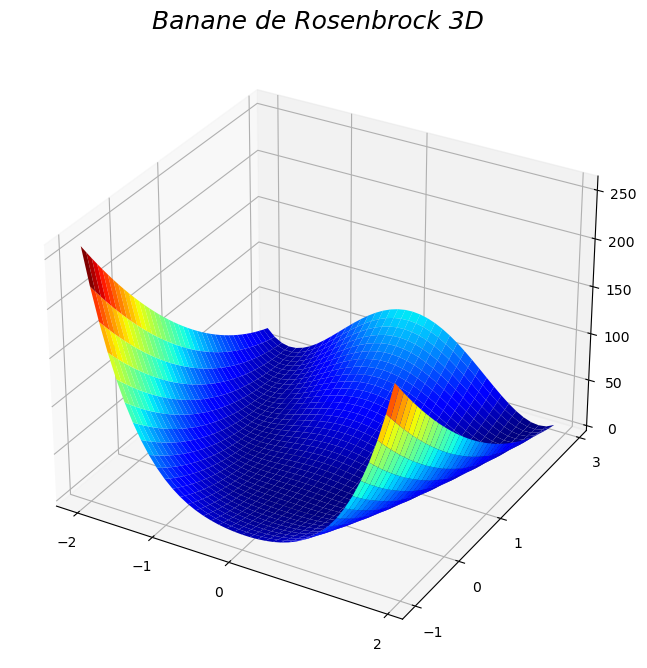

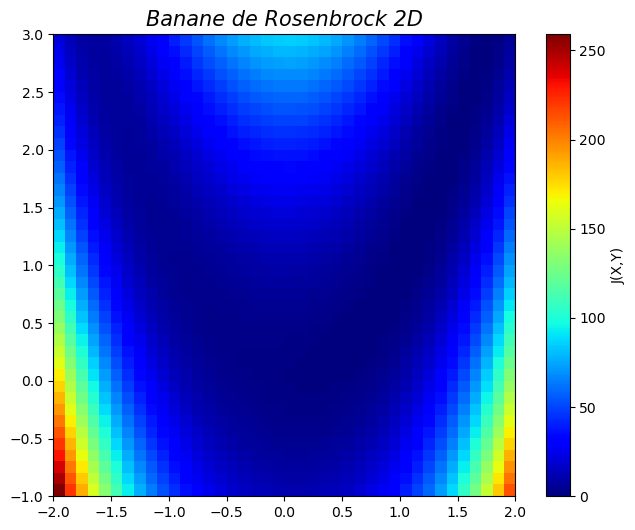

In [3]:
X = np.arange(-2, 2, 0.1)
Y = np.arange(-1, 3, 0.100)
X, Y = np.meshgrid(X, Y)
Z= J(X,Y)


fig = plt.figure(figsize=(8,8), dpi=100)
ax =fig.add_subplot(111, projection= '3d')
ax.plot_surface(X, Y, Z, cmap='jet')
ax.set_xlabels=('x')
ax.set_ylabels=('y')
ax.set_zlabels=('Z')
ax.set_xticks([-2,-1,0,2])
ax.set_yticks([-1,0,1,3])
ax.set_title('Banane de Rosenbrock 3D', pad=10, fontsize=18, style='italic')
ax.xaxis.labelpad = 10 ; ax.yaxis.labelpad = 10 ; ax.Zlabelpad = 5 
plt.show()

plt.figure(figsize=(8,6))
plt.imshow(Z,extent=[-2, 2 , -1, 3], origin='lower', cmap = "jet")
plt.title(f'Banane de Rosenbrock 2D' , fontsize=15,  style='italic')
plt.colorbar(label='J(X,Y)')
plt.show()

# 2- Minimisation de J

# 2- 1: Méthode de Gradient à pas constant

# Implémentation de la Méthode

In [4]:
def algo_grad_cons(grad_func, u0, ro, num_itérations, seuil):
    
    dim = len(u0)
    u = np.zeros((num_itérations, dim))
    u[0] = u0
    for k in range(num_itérations-1) :
        grad = grad_func(*u[k])
        u[k+1] = u[k] - ro*grad
        if np.linalg.norm(grad) < seuil: return u[:k+1,:], k
    return u, num_itérations

# Trajectoire de la convergence

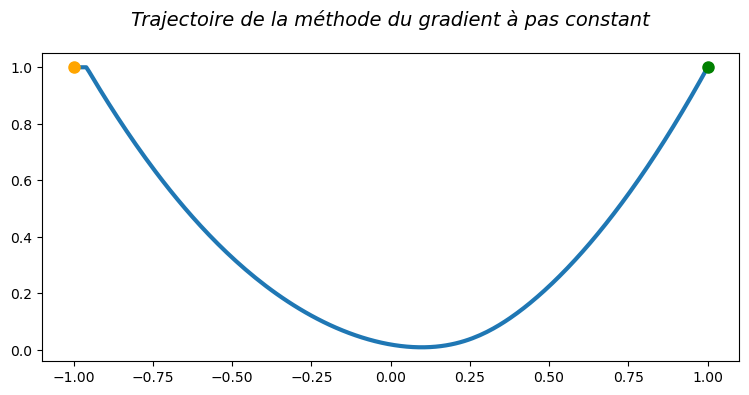

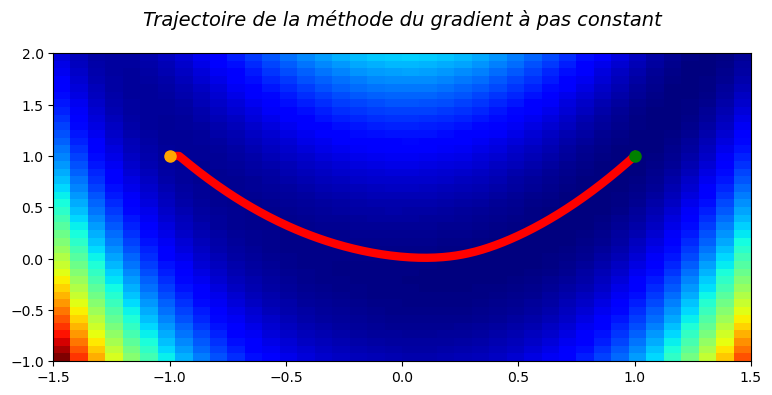

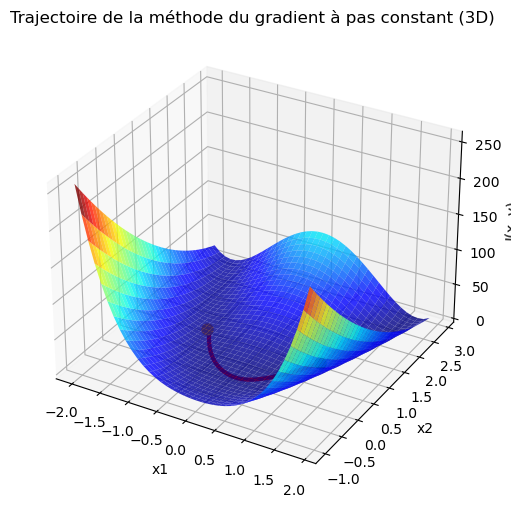

In [5]:
u, it = algo_grad_cons(grad_J, np.array([-1,1]), 0.01, 4000, 1e-5)
plt.figure(figsize=(9,4), dpi=100)
plt.plot(u.T[0],u.T[1], linewidth = 3);
plt.plot(u.T[0][0], u.T[1][0], marker='o', markersize=8, color='orange')  # Point initial
plt.plot(u.T[0][-1], u.T[1][-1], marker='o', markersize=8, color='green')  # Point final
plt.title("Trajectoire de la méthode du gradient à pas constant", pad= 20, fontsize=14, style='italic');
# Trajectoire sur l'image 2D
plt.figure(figsize=(9,4), dpi=100)
plt.imshow(Z, cmap = 'jet', extent=[-1.5,1.5, -1,2], aspect = 'auto', origin = 'lower')
plt.plot(u.T[0], u.T[1], linewidth = 6, color = 'r') ; 
plt.plot(u.T[0][0], u.T[1][0], marker='o', markersize=8, color='orange')  # Point initial
plt.plot(u.T[0][-1], u.T[1][-1], marker='o', markersize=8, color='green')  # Point final
plt.title("Trajectoire de la méthode du gradient à pas constant", pad= 20, fontsize=14, style='italic');
#plt.grid();
# Trajectoire sur l'image 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet', alpha=0.8)
ax.plot(u.T[0], u.T[1], linewidth = 3, color = 'r', linestyle = "-")  # Trajectoire principale
ax.plot(u.T[0][0], u.T[1][0], marker='o', markersize=8, color='orange')  # Point initial
ax.plot(u.T[0][-1], u.T[1][-1], marker='o', markersize=8, color='green')
    
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('J(x, y)')
ax.set_title('Trajectoire de la méthode du gradient à pas constant (3D)')
plt.show()

# Statistiques de la méthode

In [6]:
debut = time.time()
u, it = algo_grad_cons(grad_J, np.array([-1,1]), 0.01, 5000, 1e-5)
end = time.time() - debut
print(f"x* = {u[-1,:]} \nJ(x*) = {J(*u[-1,:])} \nGrad J(x*) = {grad_J(*u[-1,:])} \nIterations = {it} \nTime = {end}")
print(f"Précision = {np.linalg.norm(u[-1,:]-[1,1])}")

x* = [0.99998886 0.99997727] 
J(x*) = 1.2615056235115027e-10 
Grad J(x*) = [-4.38649320e-06 -8.94904444e-06] 
Iterations = 2658 
Time = 0.05542349815368652
Précision = 2.5315590048964537e-05


# Quelques test pour régler le pas de la trajectoire

C:\Users\moham\AppData\Local\Temp\ipykernel_5692\2274682920.py:8: RuntimeWarning: overflow encountered in scalar power
  return np.array([ 2*x - 2 +40*x**3 - 40*x*y , -20*x**2 + 20*y])
C:\Users\moham\AppData\Local\Temp\ipykernel_5692\2274682920.py:8: RuntimeWarning: invalid value encountered in scalar subtract
  return np.array([ 2*x - 2 +40*x**3 - 40*x*y , -20*x**2 + 20*y])


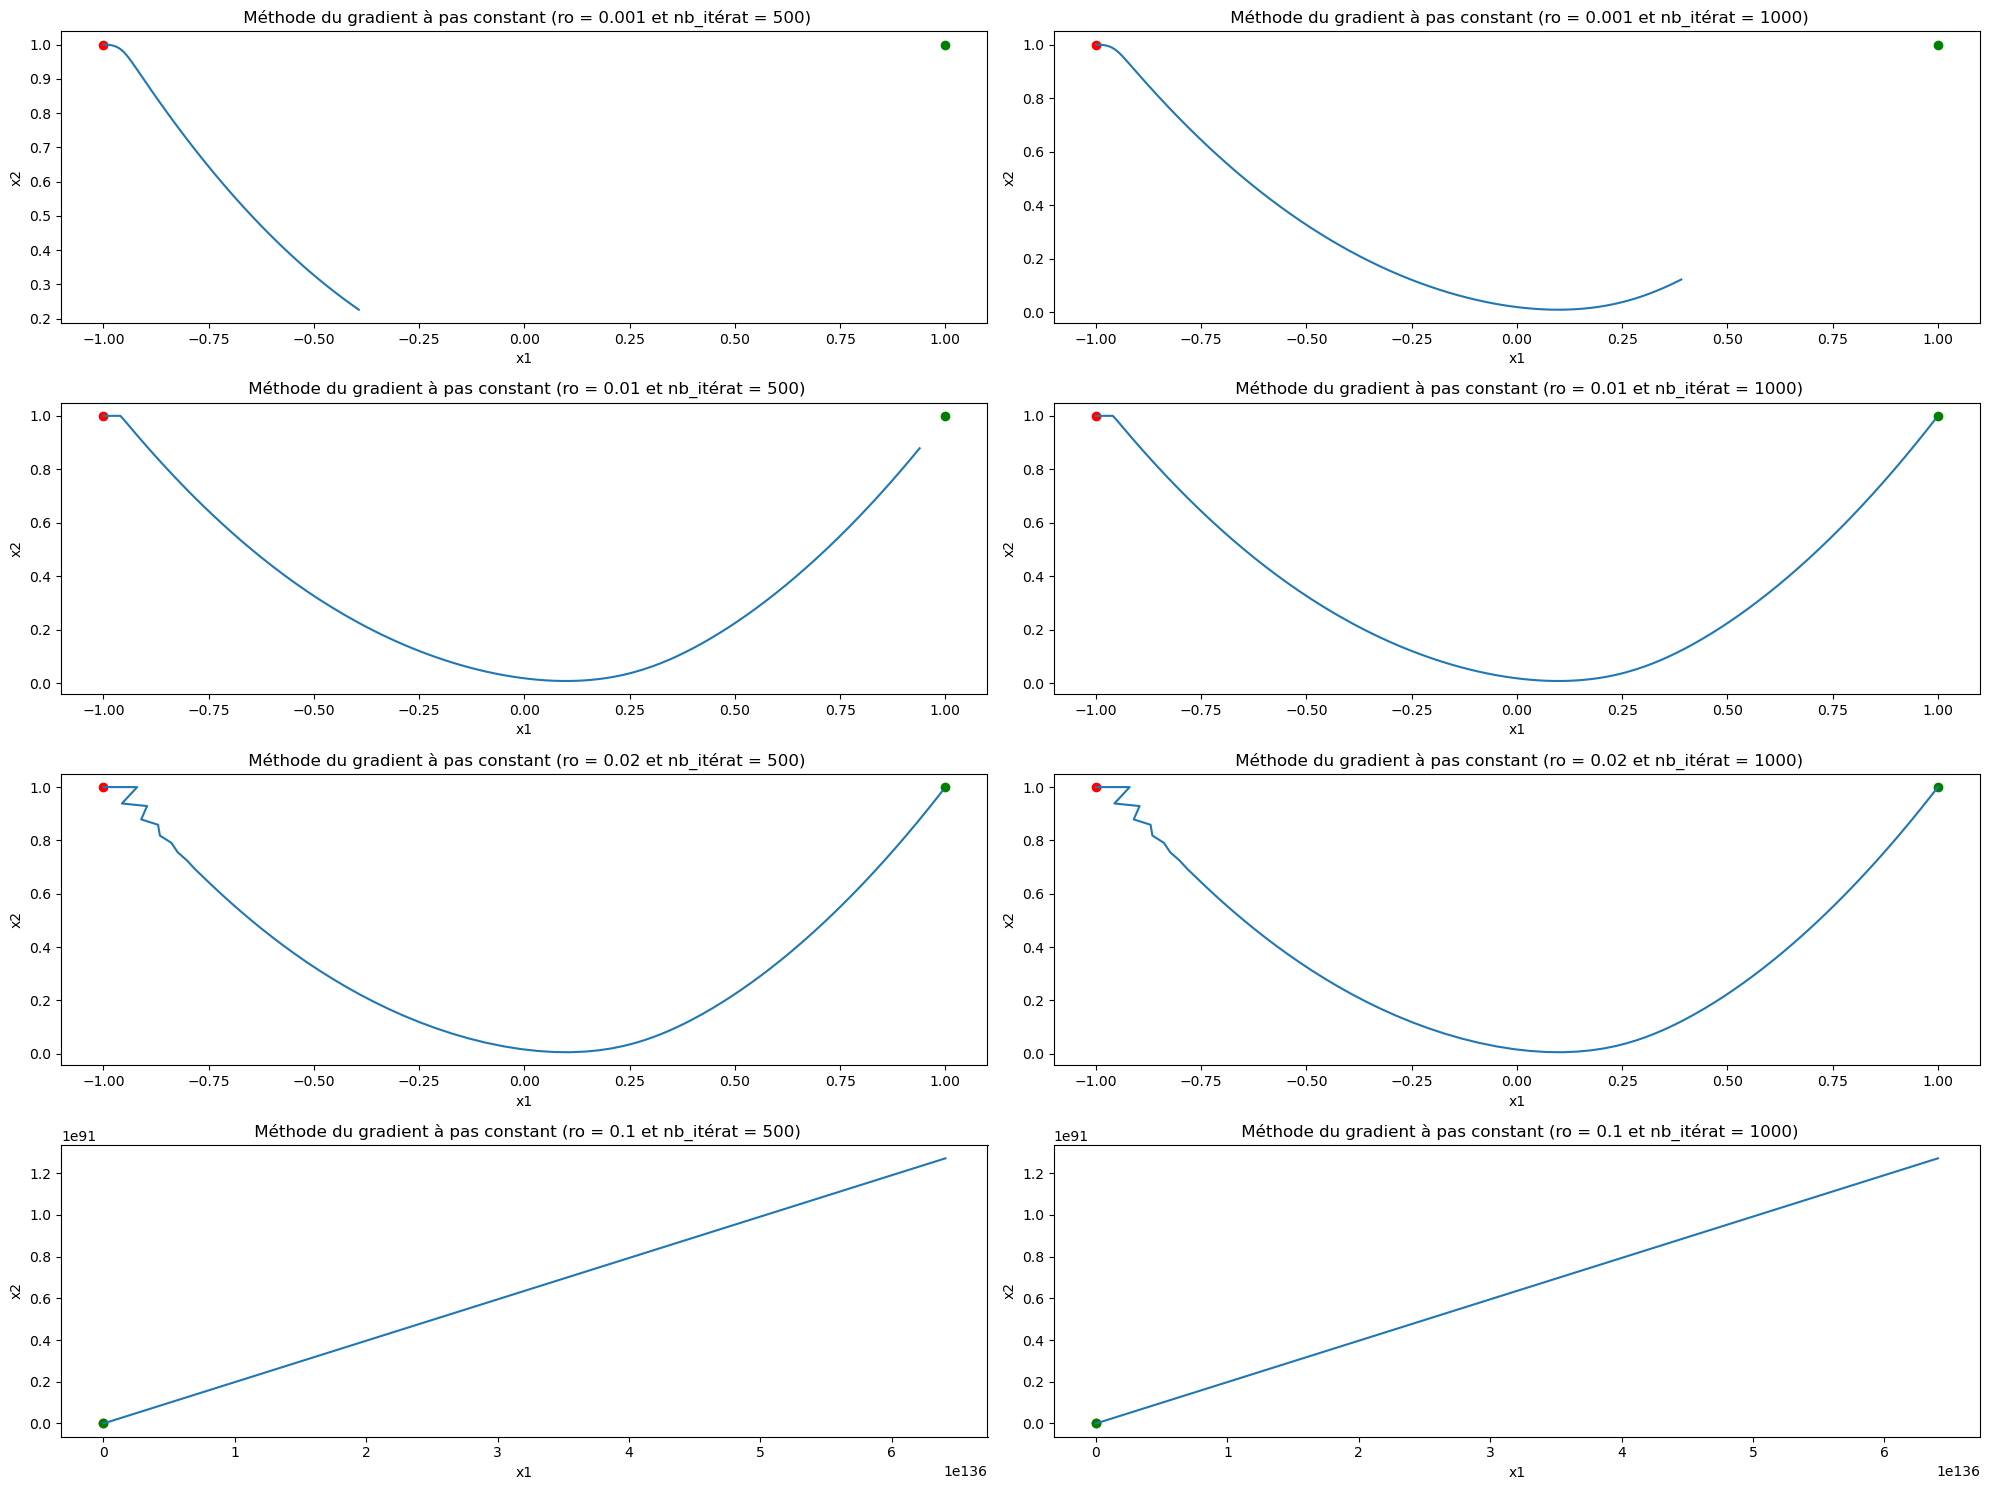

In [7]:
ro, itera = [0.001, 0.01, 0.02, 0.1] , [500, 1000]

u0 , uf = np.array([-1,1]) , np.array([1,1])

m, n = len(ro), len(itera)

fig, axes = plt.subplots(nrows = m, ncols = n, figsize = (20,15), dpi = 100)

for row, a in enumerate(ro):
    for col, it in enumerate(itera):
        
        u, it = algo_grad_cons(grad_J, np.array([-1,1]), a, it, 1e-5)
        axes[row,col].plot(u.T[0],u.T[1])
        axes[row,col].scatter(u0[0], u0[1], color='red', label='Point Initial')
        axes[row,col].scatter(uf[0], uf[1], color='green', label='Point Objectif')
        axes[row,col].set_xlabel('x1')
        axes[row,col].set_ylabel('x2')
        axes[row,col].set_title(f" Méthode du gradient à pas constant (ro = {a} et nb_itérat = {it})")

plt.tight_layout()
plt.show()

#  2-2: Méthode de newton

In [8]:
def newton_method(grad_func, hess_func, u0, num_iterations, seuil):
    dim = len(u0)
    u, d, ro = np.zeros((num_iterations, dim)), np.zeros((num_iterations, dim)),np.zeros((num_iterations, dim)) # dim = 2; u = trajectoire
    u[0] = u0
    for k in range(num_iterations-1):
        grad = grad_func(*u[k])
        hess_inv = np.linalg.inv(hess_func(*u[k]))
        update = np.dot(hess_inv, grad)
        u[k+1] = u[k] - update
        if np.linalg.norm(grad) < seuil: return u[:k+1,:], k
    return u, num_iterations


# Trajectoire pour la méthode de Newton

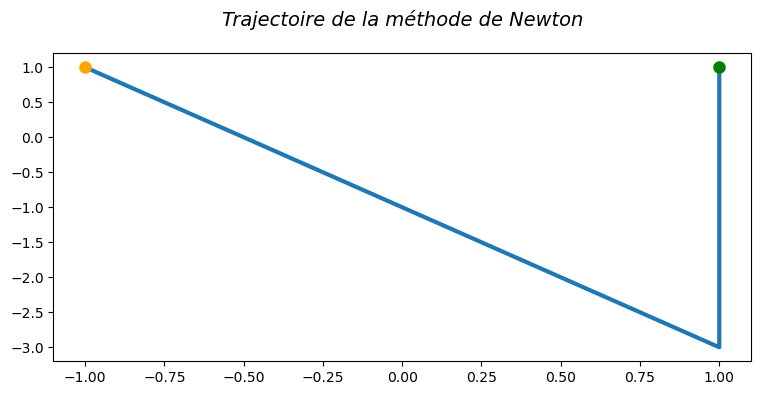

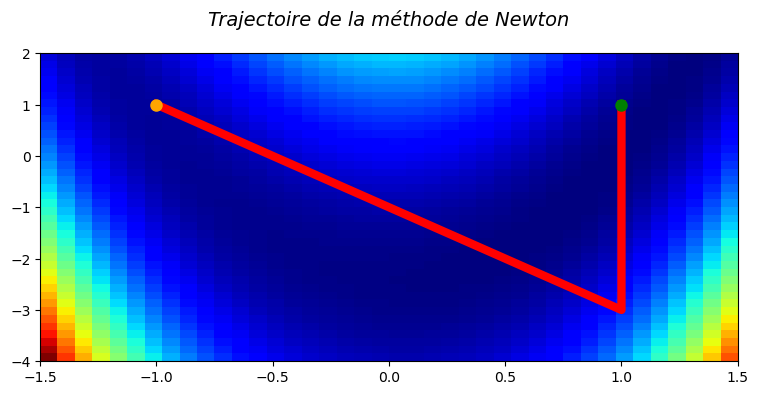

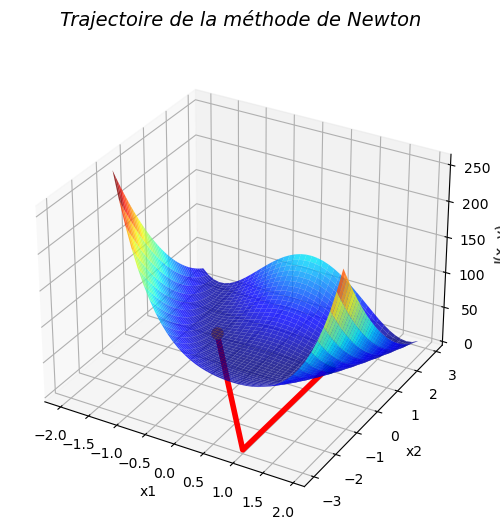

In [9]:
u_n, it_n = newton_method(grad_J, H_J, np.array([-1,1]), 1000, 1e-5)
plt.figure(figsize=(9,4), dpi=100)
plt.plot(u_n.T[0],u_n.T[1], linewidth = 3);
plt.plot(u_n.T[0][0], u_n.T[1][0], marker='o', markersize=8, color='orange')  # Point initial
plt.plot(u_n.T[0][-1], u_n.T[1][-1], marker='o', markersize=8, color='green')  # Point final
plt.title('Trajectoire de la méthode de Newton', pad= 20, fontsize=14, style='italic');
# Trajectoire sur l'image 2D
plt.figure(figsize=(9,4), dpi=100)
plt.imshow(Z, cmap = 'jet', extent=[-1.5,1.5, -4,2], aspect = 'auto', origin = 'lower')
plt.plot(u_n.T[0],u_n.T[1], linewidth = 6, color = "red");
plt.plot(u_n.T[0][0], u_n.T[1][0], marker='o', markersize=8, color='orange')  # Point initial
plt.plot(u_n.T[0][-1], u_n.T[1][-1], marker='o', markersize=8, color='green')  # Point final
plt.title('Trajectoire de la méthode de Newton', pad= 20, fontsize=14, style='italic');
# Trajectoire sur l'image 3D
# Affichage en 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet', alpha=0.8)
ax.plot(u_n.T[0],u_n.T[1], linewidth = 4, color = "red");
ax.plot(u_n.T[0][0], u_n.T[1][0], marker='o', markersize=8, color='orange')  # Point initial
ax.plot(u_n.T[0][-1], u_n.T[1][-1], marker='o', markersize=8, color='green')  # Point final

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('J(x, y)')
ax.set_title('Trajectoire de la méthode de Newton', pad= 20, fontsize=14, style='italic')
plt.show()

# Statistique de la méthode

In [10]:
debut = time.time()
u_n, it_n = newton_method(grad_J, H_J, np.array([-1,1]), 1000, 1e-5)
end = time.time() - debut
print(f"x* = {u_n[-1,:]} \nJ(x*) = {J(*u_n[-1,:])} \nGrad J(x*) = {grad_J(*u_n[-1,:])} \nIterations = {it_n} \nTime = {end}")
print(f"Précision = {np.linalg.norm(u_n[-1,:]-[1,1])}")

x* = [1. 1.] 
J(x*) = 1.1044052673094165e-29 
Grad J(x*) = [-3.55271368e-14  1.77635684e-14] 
Iterations = 2 
Time = 0.0
Précision = 3.2023728339893768e-15


# 2-3: Optimisation en 1D

# Implémention de la fonction f et Méthode de Newton 1D

In [11]:
def f(t,x,d) : #notre f(t)
    return J(*(x + t*d))

def f1(t,x,d) : #dérivée prémière
    grad = grad_J(*(x + t*d))
    return np.dot(grad, d)

def f2(t,x,d) : #dérivée séconde
    prod = np.dot(H_J(*(x + t*d)), d)
    return np.dot(prod, d)

In [12]:
def newton_1d(x,d,N=10**3) : # N ici est notre nombre d'itération maximale
    t = 0
    for i in range(N) :
        t = t - f1(t,x,d)/f2(t,x,d)
    return t

# Statistique

In [13]:
newton_1d(np.array([-1,1]), np.array([1,0]))

0.05278640450004197

# 2-4: Méthode de Relaxation

# Implémentation de la Méthode

In [14]:
def relax_method(func_minim, grad_func, u0, num_itérations, seuil):
    dim = len(u0)
    u = np.zeros((num_itérations, dim))
    u[0] = u0
    for n in range(num_itérations - 1) :
        for k in range(dim):
            di = np.zeros_like(u0); di[k] = 1
            u[n+1][k] = func_minim(x = u[n], d = di) + u[n][k]
        if np.linalg.norm(grad_func(*u[n])) < seuil: return u[:n+1,:], n * dim
    return u, num_itérations * dim

# Trajectoire de la Méthode de Relaxation

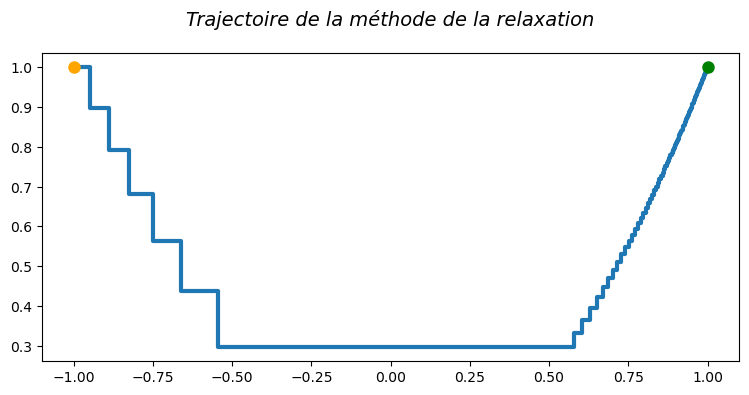

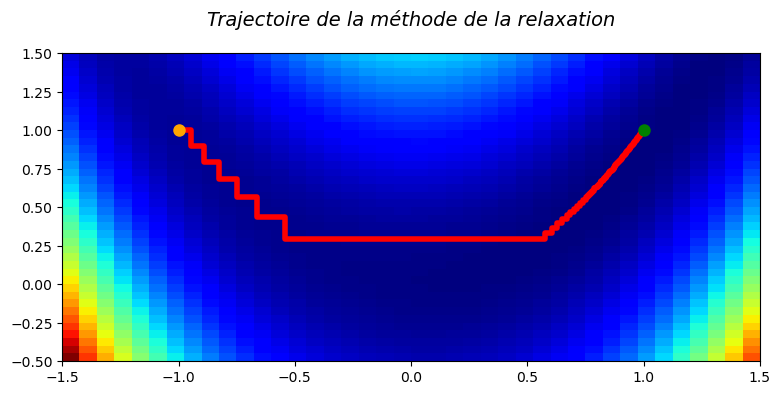

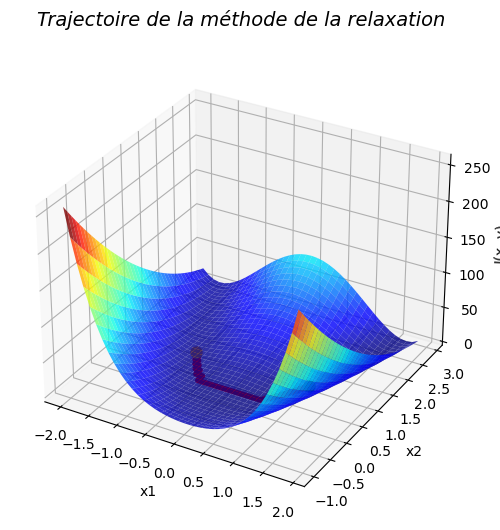

In [15]:
u_rlx, it_rlx = relax_method(newton_1d, grad_J, np.array([-1,1]), 1000, 1e-5)
plt.figure(figsize=(9,4), dpi=100)
plt.plot(u_rlx.T[0],u_rlx.T[1], linewidth = 3);
plt.plot(u_rlx.T[0][0], u_rlx.T[1][0], marker='o', markersize=8, color='orange')  # Point initial
plt.plot(u_rlx.T[0][-1], u_rlx.T[1][-1], marker='o', markersize=8, color='green')  # Point final
plt.title('Trajectoire de la méthode de la relaxation', pad= 20, fontsize=14, style='italic');
# Trajectoire sur l'image 2D
plt.figure(figsize=(9,4), dpi=100)
plt.imshow(Z, cmap = 'jet', extent=[-1.5,1.5, -0.5,1.5], aspect = 'auto', origin = 'lower')
plt.plot(u_rlx.T[0],u_rlx.T[1], linewidth = 4, color = "red");
plt.plot(u_rlx.T[0][0], u_rlx.T[1][0], marker='o', markersize=8, color='orange')  # Point initial
plt.plot(u_rlx.T[0][-1], u_rlx.T[1][-1], marker='o', markersize=8, color='green')  # Point final
plt.title('Trajectoire de la méthode de la relaxation', pad= 20, fontsize=14, style='italic'); 
# Trajectoire sur l'image 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet', alpha=0.8)
ax.plot(u_rlx.T[0],u_rlx.T[1], linewidth = 4, color = "red");
ax.plot(u_rlx.T[0][0], u_rlx.T[1][0], marker='o', markersize=8, color='orange')  # Point initial
ax.plot(u_rlx.T[0][-1], u_rlx.T[1][-1], marker='o', markersize=8, color='green')  # Point final

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('J(x, y)')
ax.set_title('Trajectoire de la méthode de la relaxation', pad= 20, fontsize=14, style='italic')
plt.show()

# Statistique de la Méthode de Relaxation

In [16]:
debut = time.time()
u_rlx, it_rlx = relax_method(newton_1d, grad_J, np.array([-1,1]), 1000, 1e-5)
end = time.time() - debut
print(f"x* = {u_rlx[-1,:]} \nJ(x*) = {J(*u_rlx[-1,:])} \nGrad J(x*) = {grad_J(*u_rlx[-1,:])} \nIterations = {it_rlx} \nTime = {end}")
print(f"Précision = {np.linalg.norm(u_rlx[-1,:]-[1,1])}")

x* = [0.99999015 0.9999798 ] 
J(x*) = 9.951251568526284e-11 
Grad J(x*) = [ 0.00000000e+00 -9.85328614e-06] 
Iterations = 1634 
Time = 53.37109303474426
Précision = 2.2474045624865636e-05


# 2-5: Méthode de Gradient à pas optimal

# Implémentation de la méthode

In [17]:
def grad_opt_method(func_minim, grad_func, u0, num_itérations, seuil) :
    dim = len(u0)
    u , ro  = np.zeros((num_itérations,dim)) , np.zeros(num_itérations)
    u[0] = u0
    for k in range(num_itérations):
        dk = -grad_func(*u[k])
        ro[k] = ro[k] + func_minim(x=u[k], d=dk)
        u[k+1] = u[k] + ro[k]*dk
        if np.linalg.norm(dk) < seuil: return u[:k+1,:], k
    return u, num_itérations

# Trajectoire pour le Gradient à pas optimal 

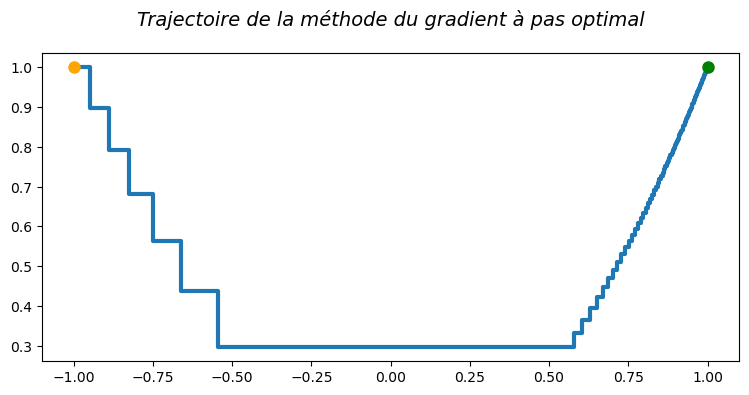

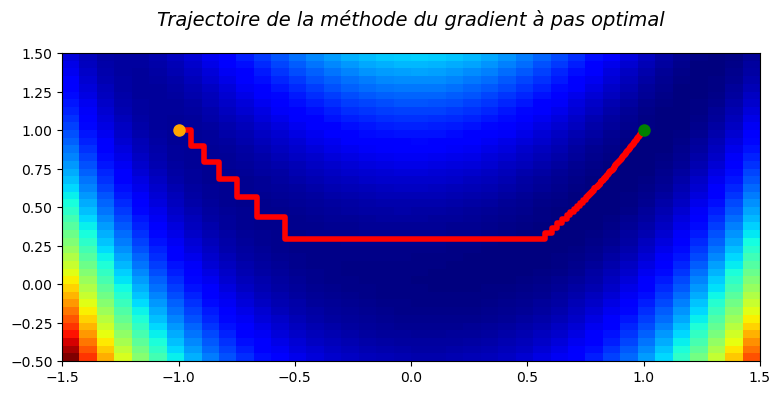

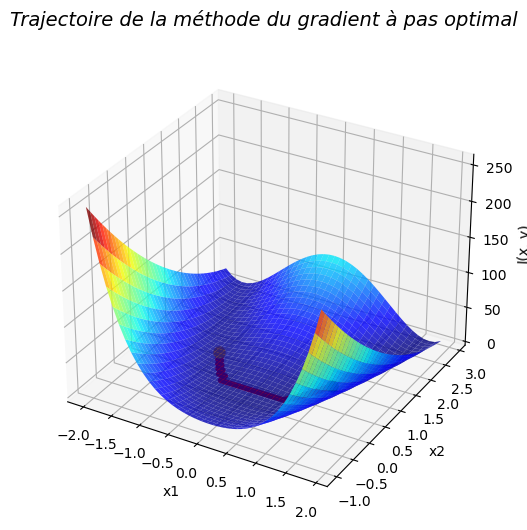

In [18]:
u_opt, it_opt = grad_opt_method(newton_1d, grad_J, np.array([-1, 1]), 1000, 1e-5)
plt.figure(figsize=(9,4), dpi=100)
plt.plot(u_opt.T[0],u_opt.T[1], linewidth = 3);
plt.plot(u_opt.T[0][0], u_opt.T[1][0], marker='o', markersize=8, color='orange')  # Point initial
plt.plot(u_opt.T[0][-1], u_opt.T[1][-1], marker='o', markersize=8, color='green')  # Point final
plt.title('Trajectoire de la méthode du gradient à pas optimal', pad= 20, fontsize=14, style='italic');
# Trajectoire sur l'image 2D
plt.figure(figsize=(9,4), dpi=100)
plt.imshow(Z, cmap = 'jet', extent=[-1.5,1.5, -0.5,1.5], aspect = 'auto', origin = 'lower')
plt.plot(u_opt.T[0], u_opt.T[1], linewidth = 4, color = "red");
plt.plot(u_opt.T[0][0], u_opt.T[1][0], marker='o', markersize=8, color='orange')  # Point initial
plt.plot(u_opt.T[0][-1], u_opt.T[1][-1], marker='o', markersize=8, color='green')  # Point final
plt.title('Trajectoire de la méthode du gradient à pas optimal', pad= 20, fontsize=14, style='italic'); 
# Trajectoire sur l'image 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet', alpha=0.8)
ax.plot(u_opt.T[0],u_opt.T[1], linewidth = 4, color = "red");
ax.plot(u_opt.T[0][0], u_opt.T[1][0], marker='o', markersize=8, color='orange')  # Point initial
ax.plot(u_opt.T[0][-1], u_opt.T[1][-1], marker='o', markersize=8, color='green')  # Point final
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('J(x, y)')
ax.set_title('Trajectoire de la méthode du gradient à pas optimal', pad= 20, fontsize=14, style='italic')
plt.show()

# Statistique de la Méthode

In [19]:
debut = time.time()
u_opt, it_opt = grad_opt_method(newton_1d, grad_J, np.array([-1, 1]), 1000, 1e-5)
end = time.time() - debut
print(f"x* = {u_opt[-1,:]} \nJ(x*) = {J(*u_opt[-1,:])} \nGrad J(x*) = {grad_J(*u_opt[-1,:])} \nIterations = {it_opt} \nTime = {end}")
print(f"Précision = {np.linalg.norm(u_opt[-1,:]-[1,1])}")

x* = [0.99999015 0.9999798 ] 
J(x*) = 9.951251523019046e-11 
Grad J(x*) = [-7.10542736e-15 -9.85328612e-06] 
Iterations = 817 
Time = 23.518465280532837
Précision = 2.2474045573474782e-05


# 2-6: Methode de Gradient conjugué

# Implémentation de la méthode

In [20]:
def grad_conj_method(func_minim, grad_func, u0, num_itérations, seuil):
    dim = len(u0)
    u = np.zeros((num_itérations + 1, dim))
    delta_u , s = np.zeros((num_itérations,dim)) , np.zeros((num_itérations,dim))
    beta , alpha = np.zeros(num_itérations) , np.zeros(num_itérations)
    u[0] = u0 ; delta_u[0] = -grad_func(*u[0]) ; alpha[0] = func_minim(x = u[0], d = delta_u[0])
    u[1] = u[0] + alpha[0]*delta_u[0] ; s[0] = delta_u[0]
    
    for k in range(1, num_itérations) :
        
        delta_u[k] = -grad_func(*u[k])
        beta[k] = np.dot(delta_u[k], delta_u[k] - delta_u[k-1])/ (np.linalg.norm(delta_u[k-1])**2)
        s[k] = delta_u[k] + beta[k]*s[k-1]
        alpha[k] = func_minim(x = u[k], d = s[k])
        u[k+1] = u[k] + alpha[k]*s[k]
        
        if np.linalg.norm(delta_u[k]) < seuil: return u[:k+1,:], k
    
    return u, num_itérations

# Trajectoire de la Méthode

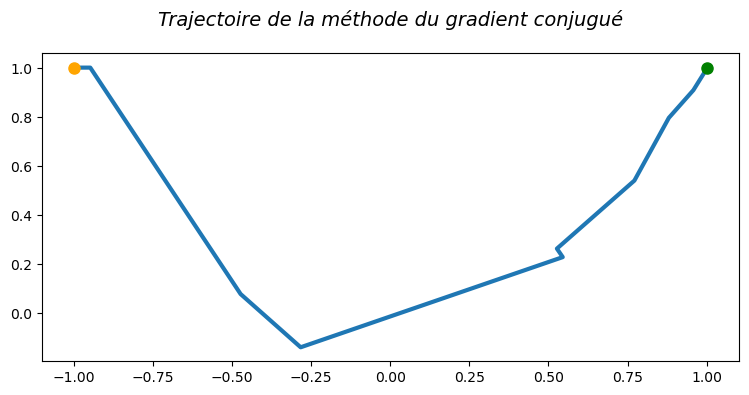

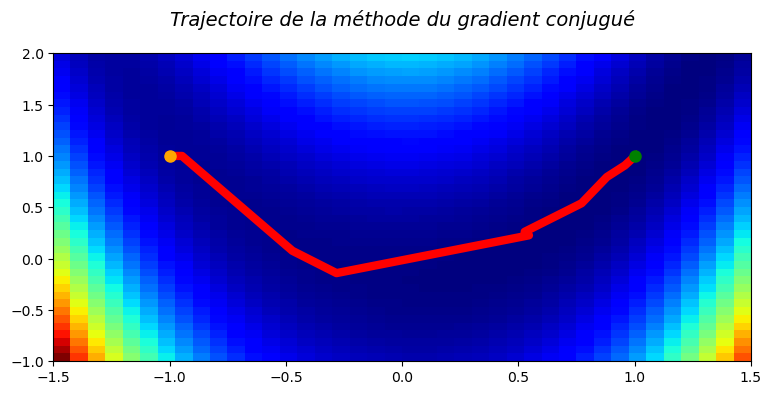

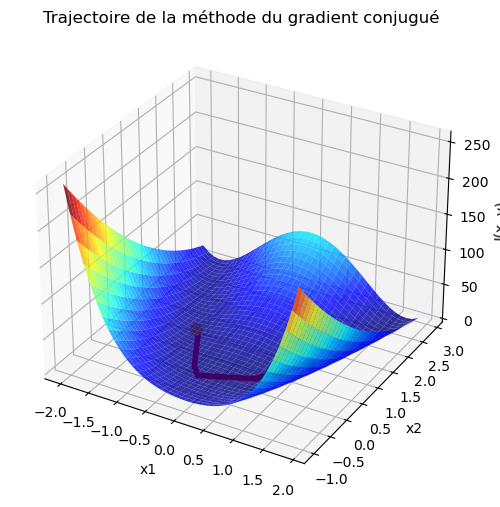

In [21]:
u_conj, it_conj = grad_conj_method(newton_1d, grad_J, np.array([-1, 1]), 100, 1e-5)
plt.figure(figsize=(9,4), dpi=100)
plt.plot(u_conj.T[0], u_conj.T[1], linewidth = 3);
plt.plot(u_conj.T[0][0], u_conj.T[1][0], marker='o', markersize=8, color='orange')  # Point initial
plt.plot(u_conj.T[0][-1], u_conj.T[1][-1], marker='o', markersize=8, color='green')  # Point final
plt.title('Trajectoire de la méthode du gradient conjugué', pad= 20, fontsize=14, style='italic');
# Trajectoire sur l'image 2D
plt.figure(figsize=(9,4), dpi=100)
plt.imshow(Z, cmap = 'jet', extent=[-1.5,1.5, -1,2], aspect = 'auto', origin = 'lower')
plt.plot(u_conj.T[0], u_conj.T[1], linewidth = 6, color = 'r') ; 
plt.plot(u_conj.T[0][0], u_conj.T[1][0], marker='o', markersize=8, color='orange')  # Point initial
plt.plot(u_conj.T[0][-1], u_conj.T[1][-1], marker='o', markersize=8, color='green')  # Point final
plt.title('Trajectoire de la méthode du gradient conjugué', pad= 20, fontsize=14, style='italic'); 
# Trajectoire sur l'image 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet', alpha=0.8)
ax.plot(u_conj.T[0], u_conj.T[1], linewidth = 4, color = 'r', linestyle = "-")  # Trajectoire principale
ax.plot(u_conj.T[0][0], u_conj.T[1][0], marker='o', markersize=8, color='orange')  # Point initial
ax.plot(u_conj.T[0][-1], u_conj.T[1][-1], marker='o', markersize=8, color='green')  # Point final

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('J(x, y)')
ax.set_title('Trajectoire de la méthode du gradient conjugué')
plt.show()

# Statistique de la Méthode

In [22]:
debut = time.time()
u_conj, it_conj = grad_conj_method(newton_1d, grad_J, np.array([-1, 1]), 100, 1e-5)
end = time.time() - debut
print(f"x* = {u_conj[-1,:]} \nJ(x*) = {J(*u_conj[-1,:])} \nGrad J(x*) = {grad_J(*u_conj[-1,:])} \nIterations = {it_conj} \nTime = {end}")
print(f"Précision = {np.linalg.norm(u_conj[-1,:]-[1,1])}")

x* = [1.00000005 1.00000011] 
J(x*) = 2.7871885977871403e-15 
Grad J(x*) = [-1.02923785e-07  1.01744963e-07] 
Iterations = 12 
Time = 0.3806328773498535
Précision = 1.1700866989138545e-07
